# Machine Learning Exercise - Binary, Regularized, and Multiclass Logistic Regression

Hey there, hi there, ho there, dear reader! Today, Andrew Ng's machine learning class (https://www.coursera.org/learn/machine-learning) has tasked us with implementing logistic regression in a number of different scenarios. Please note that in this notebook I have grouped exercise 2 and 3 from the the class together, ignoring the neural network exercise at the end of exercise 3 and implenting that separately in another repo.

So what is logistic regression (LR)? LR is a classification algorithm where we set up our classes, the y-variable, to be either 0 or 1 and then attempt to use the independent variable(s), X, to classify y. The name logistic regression comes from the use of the sigmoid or logistic function, which we will talk about in a bit. In this notebook, I try to explain the logic, the math, and the code in detail, so I hope you find it helpful.

Recommended python tutorial for machine learning: http://cs231n.github.io/python-numpy-tutorial/#numpy-arrays.

Please note that I pulled inspiration from a number of different sources, namely:
https://github.com/JWarmenhoven
https://github.com/kaleko
http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/

They're all great data scientists, so check them out!

The prompt for the first part of the exercise is:
Suppose that you are the administrator of a university department and
you want to determine each applicant's chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant's scores on two exams and the admissions
decision.
Your task is to build a classication model that estimates an applicant's
probability of admission based the scores from those two exams.

I dunno why we have to write the code ourselves if we're already an administrator, but anyway.... first thing to do is load up from the data!

Let's start by importing some libraries and examining the data. Numpy will be used for math and data manipulation stuff and we will call it 'np'. So, when we want to use numpy, we'll just say 'np'. Pandas will be used for data manipulation and preprocessing (pre-machine learning data wrangling) and we will call it 'pd'. matplotlib has a function called 'pyplot' which we will use for the plotting of figures and we will call it 'plt'. The reason we use only part of matplotlib is because we don't need the whole library. Importing the whole library is bad coding practice because it loads too much into memory, creates dependencies we may be unaware of, and gives us access to functions we may not need/want/be aware of.

In [8]:
#This code assumes the datafiles are in the same directory as the code file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, we're gonna be dealing with a number of datasets in this exercise, but they all follow a similar pattern. Namely, we need to load in the data and create our X matrix and our y vector. Additionally, since we will do this multiple times, that's a clue to write up a function so you don't have to keep writing the same code over and over again. The below code does just that! We pass it the file name and the symbol that separates the different variable-types in the file, and the function gives us back the data, our X matrix, and our y vector.

In [96]:
def getData(file, symbol):
    data = np.loadtxt(file, delimiter = symbol, usecols=(0, 1, 2), unpack = True)
    X = np.transpose(np.array(data[:-1]))
    y = np.transpose(np.array(data[-1:]))
    #We insert a column of ones for the bias or intercept term
    X = np.insert(X, 0, 1, axis = 1)
    
    return data, X, y    

In [97]:
data, X, y = getData('ex2data1.txt',',')
data.shape, X.shape, y.shape

((3, 100), (100, 3), (100, 1))

In [98]:
X

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644],
       [ 1.        , 45.08327748, 56.31637178],
       [ 1.        , 61.10666454, 96.51142588],
       [ 1.        , 75.02474557, 46.55401354],
       [ 1.        , 76.0987867 , 87.42056972],
       [ 1.        , 84.43281996, 43.53339331],
       [ 1.        , 95.86155507, 38.22527806],
       [ 1.        , 75.01365839, 30.60326323],
       [ 1.        , 82.30705337, 76.4819633 ],
       [ 1.        , 69.36458876, 97.71869196],
       [ 1.        , 39.53833914, 76.03681085],
       [ 1.        , 53.97105215, 89.20735014],
       [ 1.        , 69.07014406, 52.74046973],
       [ 1.        , 67.94685548, 46.67857411],
       [ 1.        , 70.66150955, 92.92713789],
       [ 1.        , 76.97878373, 47.57596365],
       [ 1.        , 67.37202755, 42.838

In [99]:
y

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

Not terribly meaningful is it? Let's set up a function to graph stuff for us. We know that we'll treat y = 1 as a positive sample and then treat y = 0 as a negative example. When we graph those data points, we'll denote positives with a + sign and negatives with an o symbol. Then we can just give the associated label for when y = 1 or y = 0. In this specific case, the students are admitted when y = 1 and not admitted when y = 0. Then we'll just throw up their Exam 1 and 2 scores on the y and x axis of our graph; those scores are what compose our X matrix, ignoring the column of ones for the intercept/bias term.

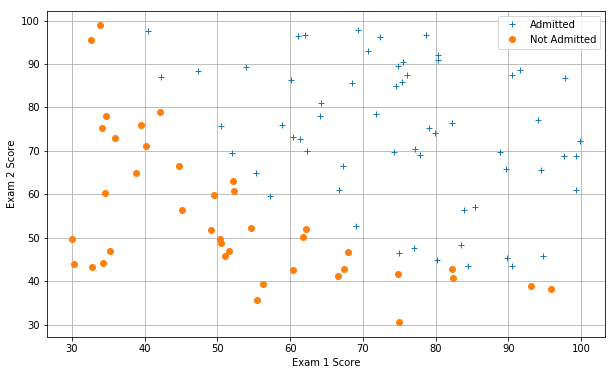

In [100]:
def plotData(X, y, x_lab, y_lab, pos_lab, neg_lab):
    pos = np.array([X[i] for i in np.arange(X.shape[0]) if y[i] == 1])
    neg = np.array([X[i] for i in np.arange(X.shape[0]) if y[i] == 0])
    plt.figure(figsize=(10,6))
    plt.plot(pos[:, 1], pos[:, 2], '+', label = pos_lab)
    plt.plot(neg[:, 1], neg[:, 2], 'o', label = neg_lab)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.legend()
    plt.grid(True)
   
    
plotData(X, y, 'Exam 1 Score', 'Exam 2 Score', 'Admitted', 'Not Admitted')

That's better! Looks like a pretty linear pattern in the data.

Now it's time for some math. In logistic regression, we use h to denote our hypothesis, which the mathematical definition of how our model makes a guess. Below, n denotes the number of features in our model. Features are basically the number of columns in our X matrix, including the bias column of ones. The number of elements in our parameter vector theta also corresponds to the number of features in our model. Because X is a matrix and theta is a vector, theta transpose X is then simply their dot product.

#### Logistic Regression Hypothesis
#### $$ h_{\theta}(x) = g(\theta^{T}x)$$
#### where $$ g(z)=\frac{1}{1+e^{−z}} $$
#### and $$ z = \theta^Tx = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... +   \theta_n x_n $$

In [101]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Not too bad, right?

g(z) is called the sigmoid or logistic function-- the heart of logistic regression. The sigmoid function smashes all of our values between 0 and 1, converting them into probabilities. If h output 0.7, for example, we would say that there is 70% chance of y = 1 as predicted by our model. In the current example, that means there is a 70% of a student being admitted to the university.

Let's draw a simple graph to see if it will give us that beautiful 'S' line!

Text(0.5,1,'Sigmoid S')

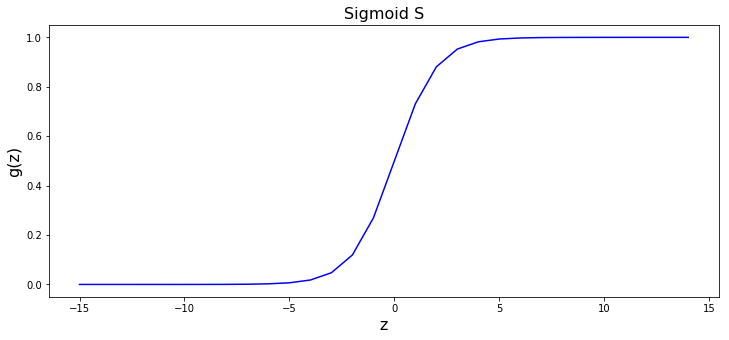

In [102]:
digits = np.arange(-15, 15, step=1)
fig, ax = plt.subplots(1, figsize=(12,5))
ax.plot(digits, sigmoid(digits), 'b')
plt.xlabel('z',fontsize=16)
plt.ylabel('g(z)',fontsize=16)
plt.title('Sigmoid S',fontsize=16)

If you don't trust my skillz, we can also use Scipy's built-in sigmoid function.

Text(0.5,1,"Scipy's Sigmoid")

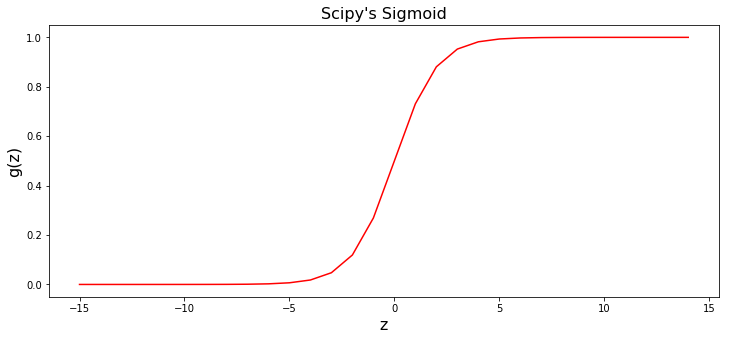

In [103]:
from scipy.special import expit
fig, ax = plt.subplots(1, figsize=(12,5))
ax.plot(digits, expit(digits), 'r')
plt.xlabel('z', fontsize=16)
plt.ylabel('g(z)', fontsize=16)
plt.title("Scipy's Sigmoid", fontsize=16)

Dat 'S' line! Notice how our function asymptotes at 0 and 1? Probabilities!

Now it's time to code up our cost function. In logistic regression we define the cost function, denoted by J of theta, as:

#### Cost Function
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$
#### Vectorized Cost Function
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

In the above equations, m is given by the number of samples we have in our data. Theta is our parameter vector, X is our X matrix, or $x^{(i)}$ is a given x, while y is our y vector, or $y^{(i)}$ is just some given y.

In machine learning, it's important to vectorize your code as much as possible. What does that mean? It means using linear algebra instead of explicit for-loops when doing computations. Why? Because linear algebra libraries are optimized, so the code runs faster and the code is easier to read.

The cost, loss, or error function of any machine learning model tries to measure the difference between our model's guess and the correct answer. That is, the output of h vs. y. The reason we use this specific cost function for logistic regression is because it is convex. Let's plot the cost function so you can see what I mean!

C:\Users\Theochem\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


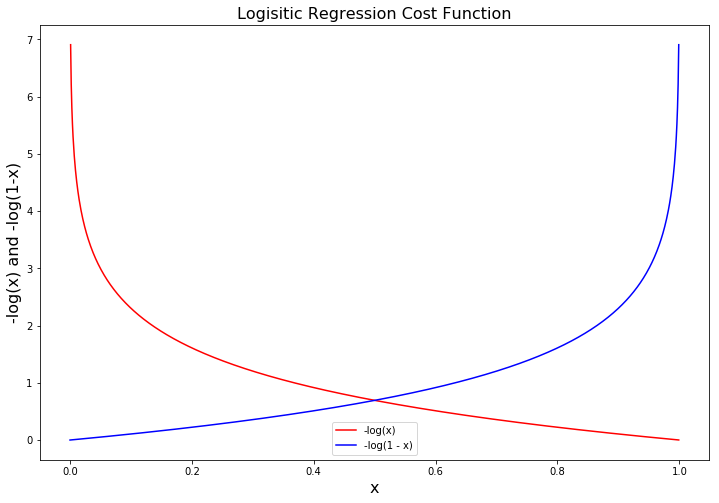

In [104]:
digits2 = np.arange(0, 1, step=0.001)
yy = -1 * np.log(1 - digits2)
fig, ax = plt.subplots(1, figsize=(12,8))
ax.plot(digits2, (-1 * np.log(digits2)), 'r', label= '-log(x)' )
ax.plot(digits2, yy,'b', label = '-log(1 - x)')
plt.xlabel('x',fontsize=16)
plt.ylabel('-log(x) and -log(1-x)',fontsize=16)
plt.title("Logisitic Regression Cost Function", fontsize=16)
plt.legend()

As you can, see there are no local minimum in the above cost function and only one global minimum. This is good because it means it's easier to find the lowest values our cost function can take on, which is when our guess is the best it can be. Additionally, see how it asymptotes at 0 and 1? This captures the intuition that if the correct answer is 1, and our hypothesis guesses 1, then we'll pay a low cost. However, if our hypothesis guesses 0 and the correct answer is 1, we'll pay a huge cost. The reverse is also true.

Let's code up the above equations! We'll make a function that takes theta, X, and y, uses the above equations to do some math, and then returns J, the cost for our current guess (some number). We'll get the value m from accessing the size of y, which is just the number of data samples we have.

NOTE: It's important to pass the function theta first because it will crash the code later when using Scipy's advanced optimization. I wasted an hour hunting down this stupid, stupid bug.

In [105]:
def computeCost(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1 * (1 / m) * (np.log(h).T.dot(y)  + np.log(1 - h).T.dot(1 - y))
    
    return J

Cool~ Now what do we do with J? Well, we need to minimize it. How do we do that? We change the values of our parameter vector theta ($\theta$). How do we do that? Glad you asked! We use the partial derivatives of $J(\theta)$ with respect to $\theta_j$, that is, just some theta. Defined as: 

#### Partial Derivative of J

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 
#### Vectorized Partial Derivative
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$

In the above equations, delta ($\delta$) is the partial derivative of our cost function J with respect to $\theta_j$, that is, just some given theta. If you don't trust me, you can find an indepth derivation of how I arrived at this definition of the partial derivative in this repo. h is our hypothesis which is defined above.

If you're unfamiliar with calculus, a derivative, also called a gradient, is the slope of a nonlinear function which our cost function happens to be. By harnessing the partial derivatives of J we can guide our cost function toward its global minimum by manipulating the values of theta. Gradient descent is an algorithm that just repeatedly takes the partial derivatives over and over again until it reaches the minimum or close enough to the minimum that we don't care to minimize J anymore.

We'll code this bad boy up, similar to how we coded up J, only this time we return a gradient or derivative object.

NOTE: It's important to pass the function theta first because it will crash the code later when using Scipy's advanced optimization. I wasted an hour hunting down this stupid, stupid bug.

In [106]:
def grad(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    
    gradient = (1 / m) * X.T.dot(h - y)

    return gradient.flatten()

Let's take these functions for a spin, shall we? We need to initialize theta as a column vector full of zeros with its dimensionality given by the number of columns in X. This is common practice in logistic regression. 

Pretty easy with numpy~

In [107]:
zero_theta = np.zeros(X.shape[1])

Dear reader, for your information, .shape[0] would access our rows because Python indexes from 0.

In [108]:
computeCost(zero_theta, X, y)[0]

0.6931471805599452

The cost is too damn high! That means our guess of theta being a bunch of zeros is a bad guess indeed. We need to change the values of theta in order to improve this guess. One way to do that would be use gradient descent. Another way, which is the way Andrew Ng demands we do it in the current exercise, is to use an advanced optimization algorithm instead. These algorithms basically do the same thing as gradient descent, only they do it much faster. We just need to give Scipy's minimize function our cost function, our current guess (zero_theta), the arguments our cost function takes, and then our gradient function. Then, Scipy will do the rest! TNC is an arbitrary choice, but I find it works the best among the optimization algorithms available with Scipy. For more info, please see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

NOTE: It's important to pass the function theta first because it will crash the code later when using Scipy's advanced optimization. I wasted an hour hunting down this stupid, stupid bug.

In [109]:
grad(zero_theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [110]:
from scipy.optimize import minimize
res = minimize(fun = computeCost, x0 = zero_theta, args=(X, y), method='TNC', jac = grad)
res

     fun: array([0.2034977])
     jac: array([9.22909509e-09, 1.05007760e-07, 4.90380175e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.1613187 ,   0.20623159,   0.20147149])

Hell yeah! As you can see, x output by the function is our solution vector, that is, the minimized values of theta. We can now use this new vector to compute some guesses and see how good our model is at classifying students as admitted vs. not admitted based on their exam scores.

Andrew Ng demands that we predict the likelihood of a student being admitted to the university when they scored 45 on Exam 1 and 85 on Exam 2. We can use res.x to access our solution vector and compute our hypothesis as normal. 

In [111]:
# one is for the bias or intercept term
print(sigmoid(np.dot(np.array([1, 45, 85]),(res.x.T))) * 100, "%")

77.62906245304801 %


Good luck anonymous student... not sure I like your odds.

Now we need to make a function that will make predictions for all of our X data. We will pass the function our new theta vector, res.x,  and our X matrix. We will then calculate our hypothesis as always, but we'll threshold the output at 0.5. What that means is that if our hypothesis outputs values greater than or equal to 0.5, we will say y = 1. The function will then return its predictions based on our optimized theta and X.

In [112]:
def prediction(theta, X):
    prob = sigmoid(np.dot(X, theta.T)) >= 0.50
    prob = prob.astype('int')
    
    return prob

So now we can calculate our accuracy. What we can do is group our predictions together with our y vector, that is true value value we're trying to predict. Every time they are the same, we will add one and if they're not, we add zero. Then we can sum up all our ones (and zeros) and divide them the number of times we guessed. This is a commonly used metric in machine learning called accuracy. It's really just a fraction of the number of correct guesses divided by the total number of guesses.

In [113]:
correct = [1 if a == b else 0 for (a, b) in zip(prediction(res.x, X), y)]
accuracy = sum(map(int, correct)) / len(correct)
print('accuracy = {0}%'.format(accuracy * 100))

accuracy = 89.0%


Now we're talking! That's pretty good!

It's time to draw the our decision boundary, which in this first exercise is just a line. The decision bounday is a place in the data were there is a clear separation between postive and negative samples.
#### Decision boundary
#### $$ h_\theta(x) = 0  $$
#### or $$ \theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0 $$
#### therefore $$ x_2 = -\frac{1} {\theta_2} (\theta_0 + \theta_1 x_1) $$ 

y = mx + b, just reengineered with thetas!

Let's first create an x interval over our data, code up the above equation, and plot our decision boundary!

Text(0.5,1,'Linear Decision Boundary for Exam 1 and 2')

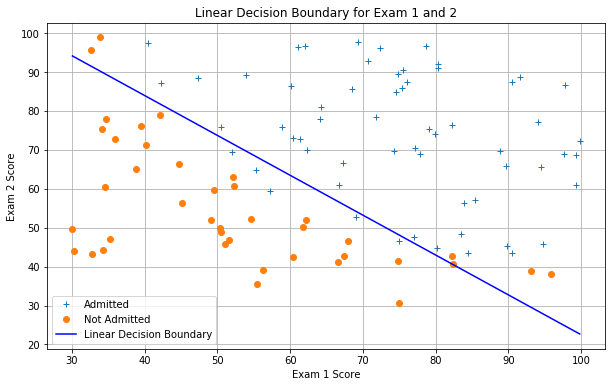

In [114]:
xs = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
ys = (-1.0 / res.x[2]) * (res.x[0] + res.x[1] * xs)
plotData(X, y, 'Exam 1 Score', 'Exam 2 Score', 'Admitted', 'Not Admitted')
plt.plot(xs, ys, 'b', label = 'Linear Decision Boundary')
plt.legend()
plt.title('Linear Decision Boundary for Exam 1 and 2')

Nice! Not a perfect separation, but pretty close and the best possible line we could draw, I'll wager.

That's it for the first exercise, but we're far from done, dear reader. Andrew Ng in the second exercise states:
In this part of the exercise, you will implement regularized logistic regression
to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly.
Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.

Okay then, fellow project managers! Let's load up the data using our function and see how much trouble we're in.

In [115]:
#this code assumes the datafile is in the same directory as the code file.
data2, X2, y2 = getData('ex2data2.txt', ',')
data2.shape, X2.shape, y2.shape

((3, 118), (118, 3), (118, 1))

In [116]:
X2

array([[ 1.       ,  0.051267 ,  0.69956  ],
       [ 1.       , -0.092742 ,  0.68494  ],
       [ 1.       , -0.21371  ,  0.69225  ],
       [ 1.       , -0.375    ,  0.50219  ],
       [ 1.       , -0.51325  ,  0.46564  ],
       [ 1.       , -0.52477  ,  0.2098   ],
       [ 1.       , -0.39804  ,  0.034357 ],
       [ 1.       , -0.30588  , -0.19225  ],
       [ 1.       ,  0.016705 , -0.40424  ],
       [ 1.       ,  0.13191  , -0.51389  ],
       [ 1.       ,  0.38537  , -0.56506  ],
       [ 1.       ,  0.52938  , -0.5212   ],
       [ 1.       ,  0.63882  , -0.24342  ],
       [ 1.       ,  0.73675  , -0.18494  ],
       [ 1.       ,  0.54666  ,  0.48757  ],
       [ 1.       ,  0.322    ,  0.5826   ],
       [ 1.       ,  0.16647  ,  0.53874  ],
       [ 1.       , -0.046659 ,  0.81652  ],
       [ 1.       , -0.17339  ,  0.69956  ],
       [ 1.       , -0.47869  ,  0.63377  ],
       [ 1.       , -0.60541  ,  0.59722  ],
       [ 1.       , -0.62846  ,  0.33406  ],
       [ 1

In [117]:
y2

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

Second verse, same as the first! We can use our plot function too.

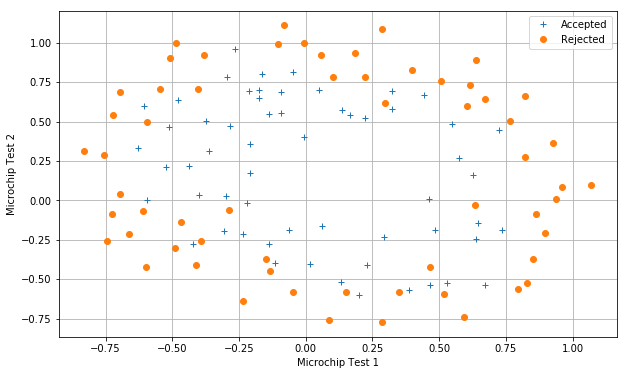

In [118]:
plotData(X2, y2, 'Microchip Test 1', 'Microchip Test 2', 'Accepted', 'Rejected')

Ohhhh man... That's a lot more complicated... I don't think a line is gonna cut it this time, dear reader. It's time to do some feature mapping! Feature mapping is when we try to fit our data using higher polynomial functions, explicitly:


#### Feature mapping
$$ X = x_0 + x_1 + x_1^2 + x_0x_1 + x_0x_1^2 + x_0x_1^3 + ... + x_0x_1x_2 + ... + x_0x_1x_2^2 + ... + ... x_{n-1}^{k-1}x_{n}^{k}$$

where n is the number of features we want and k is exponent degree we want to raise a given x to.
We basically just continue multiplying the x's with each other and raising them to high powers.

We can use our own code to do this which takes the first two columns from our X matrix, multiplies them together and raises them all two whatever degree we specify, returning a much bigger X matrix with new x values.

In [119]:
def mapFeature(x1col, x2col, degree):
    """
    Adapted from https://github.com/kaleko/CourseraML/blob/master/ex2/ex2.ipynb, who by his own admission adapted
    it from someone else. I don't know the original source.
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    out = np.ones((x1col.shape[0], 1))

    for i in np.arange(1, degree + 1):
        for j in np.arange(0, i + 1):
            term1 = x1col ** (i - j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape(term1.shape[0], 1) 
            out   = np.hstack((out, term))
    return out

In [120]:
mapped_X2 = mapFeature(X2[:,1], X2[:,2], 6)
mapped_X2, mapped_X2.shape

(array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
          6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
        [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
          1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
        [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
          1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
        ...,
        [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
          2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
        [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
          4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
        [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
          3.51474517e-07, -1.70067777e-08,  8.22905998e-10]]), (118, 28))

Scikit-learn is set up to this for us too! Please keep in mind that scikit-learn's function inserts a column with 'ones' in the design matrix for the bias or intercept term. For your reference, dear reader:

In [121]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
poly_X2 = poly.fit_transform(X2[:, 1:3])
poly_X2, poly_X2.shape

(array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
          6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
        [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
          1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
        [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
          1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
        ...,
        [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
          2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
        [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
          4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
        [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
          3.51474517e-07, -1.70067777e-08,  8.22905998e-10]]), (118, 28))

Now the time has come for us to regularize our model! Regularization is a trick that discourages overfitting. What's that? It's when the model hasn't seen enough data or is too complicated or both, and so the model performs well on data it has seen before, but fails to generalize to new examples. We also call overfitting the problem of high variance. The opposite of overfitting is underfitting, which is when model performs badly on examples its seen before and novel examples as well. Underfitting is also called the problem of high bias. We can regularize our model by redefining our cost function as follows:

#### Regularized Cost Function
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$
#### Vectorized Cost Function
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$

Lamba($\lambda$) above is called the regularization parameter or the weight decay parameter. What it does is encourage theta to remain as small as possible while still trying to fit the data. At the end of the day, lamba is just some constant value, so by increasing or decreasing the value of lamba, we can control the tradeoff between fitting the data and keeping theta small; a bigger value of lamba means smaller values of theta. By convention, we do not regularize the intercept or bias term ($ \theta_{0}$), which is why the above summations start at 1 and not 0.

Let's set up a new cost function to incorporate lamba, the regularization parameter. We'll set the default value to be 0 and then see how bigger values of lamba affect our model's performance. Remember: vectorize, vectorize, vectorize!

NOTE: It's important to pass the function theta first because it will crash the code later when using Scipy's advanced optimization. I wasted an hour hunting down this stupid, stupid bug.

In [122]:
def regComputeCost(theta, X, y, reg_param = 0):
    m = y.size
    h = sigmoid(np.dot(X, theta))
    
    J = -1.0 * (1 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))+\
    (reg_param/(2 * m)) * np.sum(np.square(theta[1:]))
    
    return J

Since our cost function's definition has changed, then so too has the definition of its partial derivatives:


#### Regularized Partial Derivative of $J(\theta) $ with respect to $ \theta_{j} $

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} + \frac{\lambda}{m}\theta_{j}$$ 
#### Vectorized Partial Derivative of $J(\theta) $ with respect to $ \theta_{j} $
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y) + \frac{\lambda}{m}\theta_{j}$$

Remember: We do not regularize $ \theta_{0} $.

NOTE: It's important to pass the function theta first because it will crash the code later when using Scipy's advanced optimization. I wasted an hour hunting down this stupid, stupid bug.

In [123]:
def regGrad(theta, X, y, reg_param = 0):
    m = y.size
    h = sigmoid(np.dot(X, theta.reshape(-1,1)))
      
    gradient = (1.0 / m) * X.T.dot(h - y) + (reg_param / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]
        
    return gradient.flatten()

Let's see what these functions can do! We need to initialize our thetas at zero again, but this time the dimensionality needs to match our feature mapped X.

In [124]:
zero_theta2 = np.zeros(poly_X2.shape[1])
zero_theta2,  zero_theta2.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), (28,))

In [125]:
#Default value of reg_param (0) is overwritten by passing the function 1
regComputeCost(zero_theta2, poly_X2, y2, 1)[0]

0.6931471805599453

In [126]:
regGrad(zero_theta2, poly_X2, y2, 1)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

Well, nothing crashed, so that's encouraging. But, as you can see, our cost is still too damn high! We can make use of Scipy's advanced optimization again. This time, because we're going to do this repeatedly, let's set up a function so we don't have to keep repeating code. We'll just pass this new function the same variables we've been using and we'll tell the function to give use back the solution vector with the minimized values of theta.

NOTE: It's important to pass the function theta first because it will crash the code later when using Scipy's advanced optimization. I wasted an hour hunting down this stupid, stupid bug.

In [127]:
def optimalTheta(theta, X, y, reg_param = 0):
    res = minimize(fun = regComputeCost, x0 = theta, args=(X, y, reg_param), method='TNC', jac = regGrad)
    
    return res.x

Here goes nothing!

In [128]:
new_theta2 = optimalTheta(zero_theta2, poly_X2, y2, 1)
new_theta2, new_theta2.shape

(array([ 1.27271025,  0.62529964,  1.18111685, -2.01987399, -0.91743188,
        -1.43166927,  0.12393228, -0.36553118, -0.35725404, -0.17516292,
        -1.45817008, -0.05098418, -0.6155856 , -0.27469166, -1.192713  ,
        -0.24217841, -0.20603304, -0.04466177, -0.27778947, -0.29539514,
        -0.45645982, -1.04319153,  0.02779373, -0.29244863,  0.01555759,
        -0.32742403, -0.14389149, -0.92467488]), (28,))

I guess it worked? Let's take a look-see. We can make predictions using our handy-dandy function from before and then calculate the accuracy.

In [129]:
correct = [1 if a == b else 0 for (a, b) in zip(prediction(new_theta2, poly_X2), y2)]
accuracy = sum(map(int, correct)) / len(correct)
print('accuracy = {0}%'.format(accuracy * 100))

accuracy = 83.05084745762711%


Ahhh, so we're accurate 83% of time when we set lamba to be 1 on the current data set.

We can now draw a non-linear decision boundary using this far more complicated data set. I'd also like to demonstrate for you, dear reader, the power of lamba and the trade off between overfitting and underfitting. Because our decision boundary is now non-linear, we need to write a much more complicated plotting function.

In [130]:
def plotBoundary(theta, X, y, reg_param = 0):
    """
    This cell of code was adapted from https://github.com/kaleko/CourseraML/blob/master/ex2/ex2.ipynb
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta = optimalTheta(theta, X, y, reg_param)
    xs = np.linspace(-1, 1.5, 50)
    ys = np.linspace(-1, 1.5, 50)
    zs = np.zeros((len(xs), len(ys)))
    for i in np.arange(len(xs)):
        for j in np.arange(len(ys)):
            features_i_j = mapFeature(np.array([xs[i]]), np.array([ys[j]]), 6)
            zs[i][j] = np.dot(theta, features_i_j.T)
    zs = zs.transpose()

    u, v = np.meshgrid(xs, ys)
    plt.contour(xs, ys, zs, [0])
    correct = [1 if a == b else 0 for (a, b) in zip(prediction(theta, X), y)]
    accuracy = (sum(map(int, correct)) / len(correct)) * 100
    
    plt.title("Decision Boundary: Lamba = {} with accuracy of {}% ".format(reg_param, np.round(accuracy, decimals = 2)))

Let's see what happens when we use lamba at its default value of 0. In order words, logistic regression with no regularization.

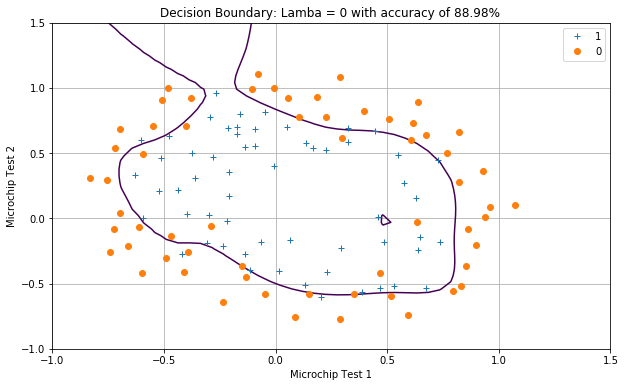

In [131]:
plotData(X2, y2, 'Microchip Test 1', 'Microchip Test 2', '1', '0')
plotBoundary(zero_theta2, poly_X2, y2)

Our accuracy has jumped up quite a bit, but we've also drawn a really funky-looking boundary. Such highly variable boundaries are a good indication of overfitting, meaning it's unlikely our model will generalize well to novel data examples.

What if we set lamba = 1?

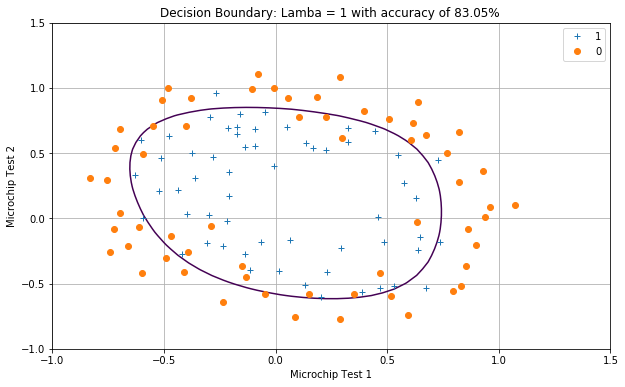

In [132]:
plotData(X2, y2, 'Microchip Test 1', 'Microchip Test 2', '1', '0')
plotBoundary(zero_theta2, poly_X2, y2, 1)

Well, our accuracy took a hit, but this is a much better-looking and smoother decision boundary. Andrew Ng himself says this kind of decision boundary is "just right, Goldilocks."... I may have added the Goldilocks part.

How about lamba = 10?

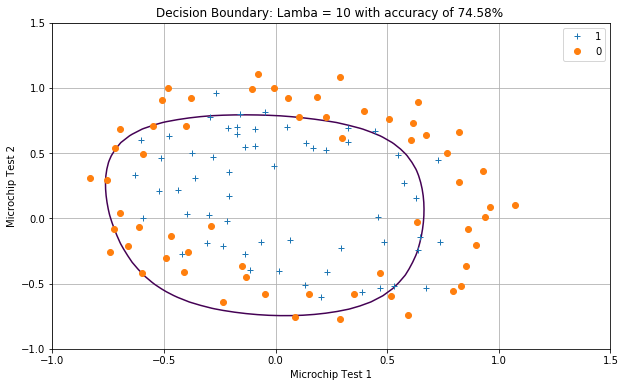

In [133]:
plotData(X2, y2, 'Microchip Test 1', 'Microchip Test 2', '1', '0')
plotBoundary(zero_theta2, poly_X2, y2, 10)

Now we're underfitting or our model has high bias, performing badly even on the training data let alone some new data.

lamba = 100?

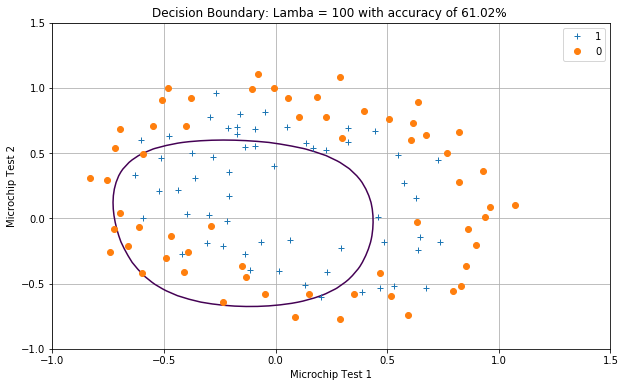

In [134]:
plotData(X2, y2, 'Microchip Test 1', 'Microchip Test 2', '1', '0')
plotBoundary(zero_theta2, poly_X2, y2, 100)

Terrible!
Just for giggles, 176 is the highest you can set lamba and still get a detectable contour. See that purple dot below? That's our decision boundary with lamba = 176, and we're performing only slightly better than chance.

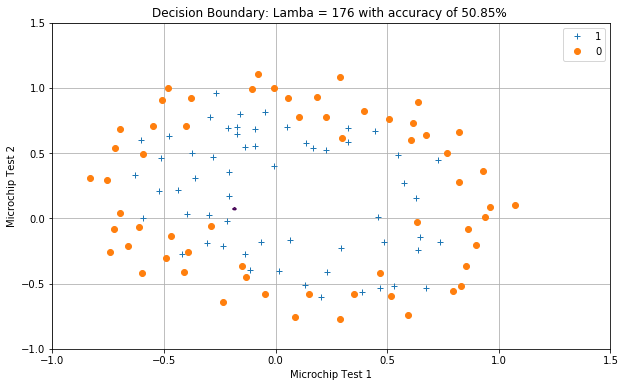

In [135]:
plotData(X2, y2, 'Microchip Test 1', 'Microchip Test 2', '1', '0')
plotBoundary(zero_theta2, poly_X2, y2, 176)

With exercise 2 done, let's move on to the logistic regression portion of exercise 3, where we will perform the computer vision favorite of hand-written digit classification. This is a task logistic regression is quite good at. The format of the datafile is now a .mat file from Matlab's native format, so we will need to get a hand from Scipy to load it up.

In [136]:
#This code assumes the datafiles are in the same directory as the code file
from scipy.io import loadmat

data3 = loadmat('ex3data1.mat')
data3

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

This loads in as a python dictionary, so it's pretty easy to set up our X matrix and y vector. Just need to insert the column of ones for the bias or intercept term.

In [137]:
y3 = data3['y']
X3 = np.c_[np.ones((data3['X'].shape[0], 1)), data3['X']]
print('X:', X3.shape, '(+ bias term)')
print('y:', y3.shape)

X: (5000, 401) (+ bias term)
y: (5000, 1)


So X is a 5000 by 401 matrix, meaning 5000 data examples or rows (the value 'm') and 401 columns; in machine learning columns are often called features. The 400 comes from the fact that pictures from our data are 20x20 pixels and the number in each cell is the grayscale value of the pixel in question. 1 comes from adding the bias or intercept term, which allows us to fit the data more accurately because we don't force our model to pass through the origin. y is a 5000 by 1 column vector will 5000 elements that correspond to whatever picture X's grayscale pixel values are supposed to represent.

... What? A picture is worth a thousand words so let's take a look! Let's randomly select some rows from our X matrix and use matplotlib to translate the pixel values into pictures

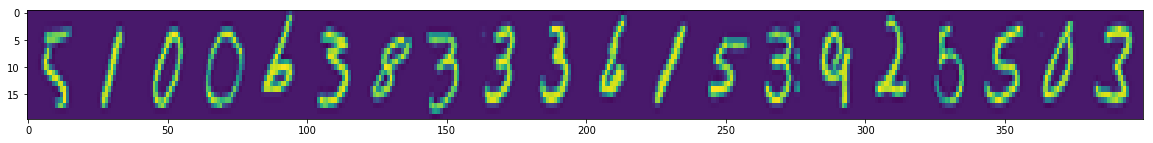

In [138]:
ran_samp = np.random.choice(X3.shape[0], 20)
plt.figure(figsize = (20, 2))
plt.imshow(X3[ran_samp, 1:].reshape(-1, 20).T, interpolation = 'nearest', aspect = 'auto')

So then one element of y is just the text representation of one of the above hand-written digit images.

You may have realized that in the above two exercises we were only doing binary classification, that is, y could only be 0 or 1. Now, however, y can take on 10 different values (0 - 9). All of our clever math is based on y being binary, so what can we do to overcome this? It's all called one-vs.-all classification! What we do is just look at one type of y at a time. If it's the y we're interested in at that time, then we say that all of those values are equal to 1, and if they're not, then they're 0. For example, using the hand-written digit classification problem, say at one point we're just looking for "3". Ok, so when we train we say, "If y is equal to 3, then I'm going to set y equal to 1. If not, then y is equal to 0." If we're looking for 4, then we would say "If y is equal to 4, then I'm going to set y equal to 1. If not, then y is equal to 0." And so on! So what we're doing is creating different logisitic regression classifiers where each one is really good at classifiying one of the values y can take on. At test time, we just choose whichever classifier yields the highest probability of y being equal to 1, that is, y is the value that classifier was trained to learn.

Clever right?

What is this means programmatically is setting up a function that takes in X, y, the number of labels we're interesting in (in this case 10 (0 - 9)), and a lamba value. Inside the function we'll intialize theta as a column vector of zeros with its dimensionality given by X's column count (401x1). Then we'll intialize a theta matrix full of zeros, where its dimensionality is given by (label number x X's column count) (10x401 in this case). This theta matrix will store all the optimized values of our 10 different classifiers. We'll get these optimized values by using our handy-dandy optimalTheta function that harnesses Scipy's minimization powers.

In [139]:
def oneVAll(X, y, lab_num, reg_param):
    zero_theta = np.zeros((X.shape[1], 1)) #401x1
    all_theta = np.zeros((lab_num, X.shape[1])) #10x401
    
    for i in np.arange(1, lab_num + 1):
        # i-1 because python indexes from 0, but we starting counting up from 1
        # y == i : y is the number we're looking for at this moment
        all_theta[i-1,:] = optimalTheta(zero_theta, X, y == i, reg_param)
              
    
    return all_theta        

Let's take a look at our new theta--ascended from its status as a lowly vector to a glorious matrix.

In [141]:
# 10 different classes, lambda of 0.1
new_theta3 = oneVAll(X3, y3, 10, 0.1)
new_theta3, new_theta3.shape

(array([[-3.07209150e+00,  0.00000000e+00,  0.00000000e+00, ...,
          6.83994259e-03, -2.93583111e-10,  0.00000000e+00],
        [-3.73221215e+00,  0.00000000e+00,  0.00000000e+00, ...,
          2.33346949e-02, -2.55932029e-03,  0.00000000e+00],
        [-5.71267163e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -6.27868869e-05, -3.61375962e-07,  0.00000000e+00],
        ...,
        [-9.12551429e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -6.16739281e-04,  6.96212587e-05,  0.00000000e+00],
        [-5.62189442e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -1.12771539e-02,  8.58907140e-04,  0.00000000e+00],
        [-8.06799574e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -3.54044724e-05,  9.56083120e-07,  0.00000000e+00]]), (10, 401))

Now we can compute our hypothesis same as before, after transposing theta because it's a matrix now, to generate probabilties. However, now we'll generate 10 different probabilities for each element of y because we trained 10 different classifiers. We can use np.argmax to find the index of whichever classifier returned the highest probability for a given y. The classifier index will then be the number we're attempting to classify.

In [142]:
def predictAll(theta, X):
    all_probs = sigmoid(np.dot(X, theta.T))
    # add one because python indexes from 0
    high_prob = np.argmax(all_probs, axis = 1) + 1
    
    return high_prob

Moment of truth! Let's check out our accuracy.

In [143]:
correct = [1 if a == b else 0 for (a, b) in zip(predictAll(new_theta3, X3), y3)]
accuracy = (sum(map(int, correct)) / len(correct)) * 100
print("accuracy = {} %".format(accuracy))

accuracy = 96.46000000000001 %


Oh snap! How do you like them apples, hand-written digits?!


For your reference, dear reader, you don't to code up logistic regression from scratch every time you've got a digit to classify. Scikit-learn is set up to do a pretty legit job on its own.

Note: Scikit-learn adds the intercept term automatically, so we exclude it when we pass their function the X matrix. Also, the function prefers y to be a row vector rather than a column vector, so we use .ravel() to make it happy.

For more information on my parameter choices, please see: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### Logistic Regression with Scikit-learn

In [144]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 1, penalty='l2', solver='newton-cg')
lr.fit(X3[:, 1:], y3.ravel())

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

We can take the mean of the amount of times Scikit-learn guessed correctly, validated against our row vector y, and then multiply that by 100 to get a percentage. Yet another way to calculate accuracy.

In [145]:
print("Scikit-learn's accuracy: {}%".format(np.mean(lr.predict(X3[:, 1:]) == y3.ravel())*100))

Scikit-learn's accuracy: 94.46%


Woooo! We did better than Scikit-learn! That's only because we used their default values for logistic regression. If you play around a bit, you can find a slightly more accurate fit to the data, though not by much!

At any rate that concludes Andrew Ng's logistic regression problems from exercise 2 and 3. I hope this notebook was helpful to you, dear reader.